In [1]:
import numpy as np
import pylab as pl
from numpy import fft

In [23]:
import pandas as pd

In [32]:
import datetime as dt
from datetime import datetime, timedelta

In [67]:
import math

In [236]:
def fourierExtrapolation(data , n_predict_percent, n_harm):
    x = data
    n_predict = math.ceil(n_predict_percent * len(data))
    n= x.size
    n_harm = n_harm                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = np.arange(n)
    # sort indexes by frequency, lower -> higher
#     print(list(range(n)))
    indexes = list(range(n)) 
#     indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
def main(data, n_predict_percent, n_harm):
    
    data_test = data[-math.ceil(n_predict_percent * len(data)):]
#     print((math.ceil(n_predict_percent * len(data))))
    x = data[:len(data) - math.ceil(n_predict_percent * len(data))] # np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 562, 491, 714, 530, 521, 687, 776, 802, 499, 536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 1052, 1072, 1357, 768, 986, 816, 889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 1524, 1231, 1577, 2459, 1848, 1506, 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 1416, 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, 1254, 1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 1906, 2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 756, 1161, 1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, 602, 903, 1142, 1410, 1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223, 782, 2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181, 1035, 1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, 1256, 1009, 1175, 1176, 870, 856, 860])
    n_predict = math.ceil(n_predict_percent * len(data))
#     print(n_predict)
    extrapolation = fourierExtrapolation(x, n_predict_percent, n_harm)
#     global ext 
#     ext = extrapolation
#     print(extrapolation)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
    pl.plot(np.arange(len(x), data.size), data_test, 'g', label = 'real')
    pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
    pl.legend()
    pl.show()

In [237]:
# x_original_array = np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 562, 491, 714, 530, 521, 687, 776, 802, 499, 536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 1052, 1072, 1357, 768, 986, 816, 889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 1524, 1231, 1577, 2459, 1848, 1506, 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 1416, 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, 1254, 1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 1906, 2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 756, 1161, 1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, 602, 903, 1142, 1410, 1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223, 782, 2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181, 1035, 1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, 1256, 1009, 1175, 1176, 870, 856, 860])

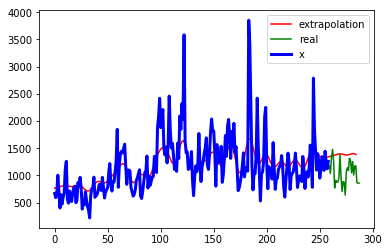

In [242]:
main(x_original_array,0.1,10)

In [196]:
np.arange(2, 6), ddd[-4:]

(array([2, 3, 4, 5]), array([3, 4, 5, 6]))

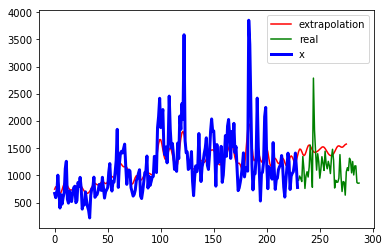

In [246]:
main(x_original_array,0.2,15)

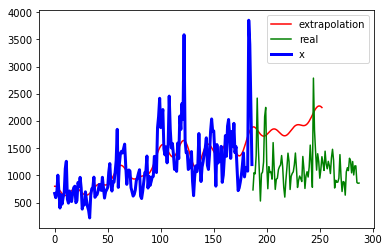

In [243]:
main(x_original_array,0.35,5)

In [113]:
XRP_USD_1min_path = 'D:\Database\Bitfinex-historical-data-master_backup\Bitfinex-historical-data-master\XRPUSD\Candles_1m'

In [114]:
header_format = ['timestamp_UTC_millisec',
'open_price',
'close_price',
'highest_price',
'lowest_price',
'volume']

In [115]:
xrp_2018_full = pd.read_csv(XRP_USD_1min_path + '/2018/merged.csv', header=None)

In [116]:
xrp_2019_until_Oct = pd.read_csv(XRP_USD_1min_path + '/2019/merged.csv', header=None)

In [117]:
xrp_2018_full.columns = header_format

In [118]:
xrp_2019_until_Oct.columns = header_format

In [119]:
xrp_2018_onwards = pd.concat([xrp_2018_full, xrp_2019_until_Oct])

In [120]:
XRP_Data = xrp_2018_onwards[xrp_2018_onwards['timestamp_UTC_millisec'] >= 1534287600000]

In [121]:
XRP_Data['datetime_real'] = XRP_Data['timestamp_UTC_millisec'].apply(lambda x: datetime.utcfromtimestamp(x/1000))

c:\users\zhen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
len(XRP_Data)

564561

In [123]:
XRP_Data['datetime_real'].min()

Timestamp('2018-08-14 23:00:00')

In [124]:
XRP_Data['datetime_real'].max()

Timestamp('2019-11-01 15:59:00')

In [125]:
(XRP_Data['datetime_real'].max() - XRP_Data['datetime_real'].min())

Timedelta('443 days 16:59:00')

In [126]:
XRP_Data['checking_timestamp_UTC_millisec'] = XRP_Data['timestamp_UTC_millisec'].shift(-1)

c:\users\zhen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
XRP_Data['dif'] = XRP_Data['checking_timestamp_UTC_millisec'] - XRP_Data['timestamp_UTC_millisec']

c:\users\zhen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
XRP_Data_resample_1min_ffill = XRP_Data.set_index('datetime_real').resample('1T').ffill()

In [129]:
XRP_Data_resample_1min_ffill['checking_timestamp_UTC_millisec'] = XRP_Data_resample_1min_ffill['timestamp_UTC_millisec'].shift(-1)

In [130]:
XRP_Data_resample_1min_ffill['dif'] = XRP_Data_resample_1min_ffill['checking_timestamp_UTC_millisec'] - XRP_Data_resample_1min_ffill['timestamp_UTC_millisec']

In [131]:
XRP_Data_resample_1min_ffill['timestamp_UTC'] = XRP_Data_resample_1min_ffill['timestamp_UTC_millisec']/1000

In [132]:
XRP_Data_resample_1min_ffill.head()

,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
datetime_real,,,,,,,,,
2018-08-14 23:00:00,1534287600000,0.26444,0.26427,0.26448,0.26427,21493.134691,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:01:00,1534287660000,0.26410,0.26408,0.26418,0.26408,6316.950507,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:02:00,1534287720000,0.26419,0.26429,0.26429,0.26390,15876.859198,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:03:00,1534287780000,0.26389,0.26359,0.26389,0.26359,15102.000000,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:04:00,1534287840000,0.26368,0.26359,0.26379,0.26359,6305.473357,1.534288e+12,60000.0,1.534288e+09


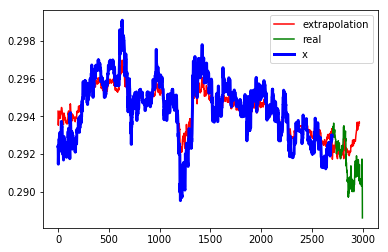

In [258]:
main(XRP_Data_resample_1min_ffill['close_price'][-3000:],0.1,300)